# Estrategias Evolutivas EE-(μ,λ)


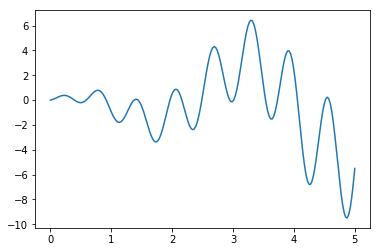

In [11]:
#importación de bibliotecas numpy(calculo matemático) y matplotlib (blibioteca para graficar funciones)

import numpy as np
import matplotlib.pyplot as plt

ADN_TAMANIO = 1             # ADN (número real)
ADN_LIGADO = [0, 5]         # Solución de los límites superior e inferior
N_GENERACIONES = 200
POP_TAMANIO = 100           # TAMAÑO DE LA POBLACION
N_HIJOS = 50 



#Función para encontrar el máximo
def F(x): return np.sin(10*x)*x + np.cos(2*x)*x


#Encontrar una aptitud con un valor diferente de cero para la selección
def get_fitness(pred): return pred.flatten()


def make_kid(pop, n_kid):
    # Generar un conjunto de niños vacío 
    kids = {'ADN': np.empty((n_kid, ADN_TAMANIO))}
    kids['mut_strength'] = np.empty_like(kids['ADN'])
    for kv, ks in zip(kids['ADN'], kids['mut_strength']):
        # cruce (aproximadamente la mitad p1 y la mitad p2)
        p1, p2 = np.random.choice(np.arange(POP_TAMANIO), size=2, replace=False)
        cp = np.random.randint(0, 2, ADN_TAMANIO, dtype=np.bool)  # crossover points
        kv[cp] = pop['ADN'][p1, cp]
        kv[~cp] = pop['ADN'][p2, ~cp]
        ks[cp] = pop['mut_strength'][p1, cp]
        ks[~cp] = pop['mut_strength'][p2, ~cp]

        # mutar (cambiar el ADN basado en la distribución normal)
        ks[:] = np.maximum(ks + (np.random.rand(*ks.shape)-0.5), 0.)    # tiene que ser > 0
        kv += ks * np.random.randn(*kv.shape)
        kv[:] = np.clip(kv, *ADN_LIGADO)    # recortar el valor mutado
    return kids


def kill_bad(pop, kids):
    
    for key in ['ADN', 'mut_strength']:
        pop[key] = np.vstack((pop[key], kids[key]))

    fitness = get_fitness(F(pop['ADN']))            # calcular el fitness global
    idx = np.arange(pop['ADN'].shape[0])
    good_idx = idx[fitness.argsort()][-POP_TAMANIO:]   # Selecciónado por ranking de aptitud
    for key in ['ADN', 'mut_strength']:
        pop[key] = pop[key][good_idx]
    return pop


pop = dict(ADN=5 * np.random.rand(1, ADN_TAMANIO).repeat(POP_TAMANIO, axis=0),   # inicializar los valores del ADN
           mut_strength=np.random.rand(POP_TAMANIO, ADN_TAMANIO))                # inicializar los valores de fuerza de mutación

plt.ion()      
x = np.linspace(*ADN_LIGADO, 200)
plt.plot(x, F(x))



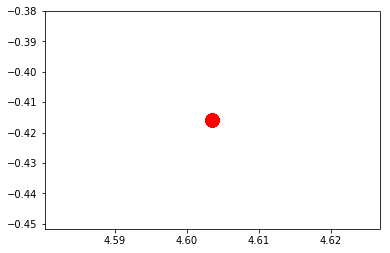

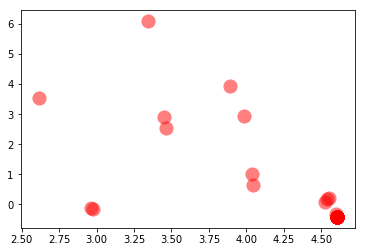

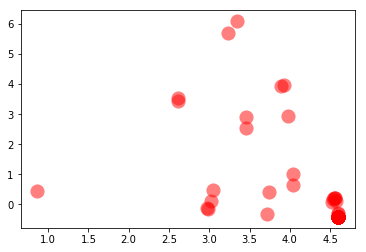

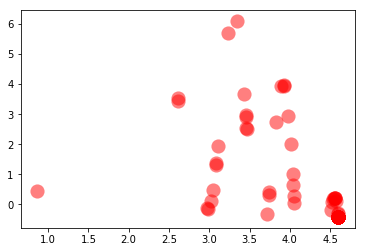

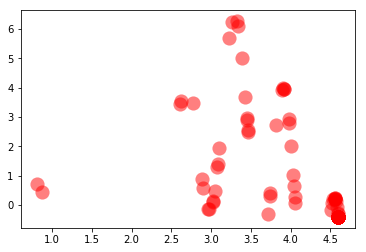

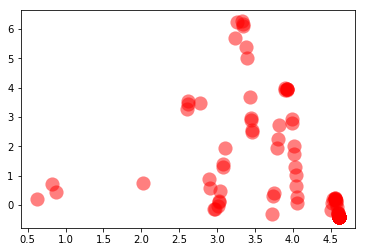

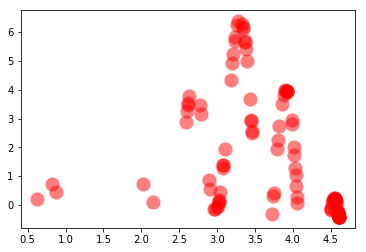

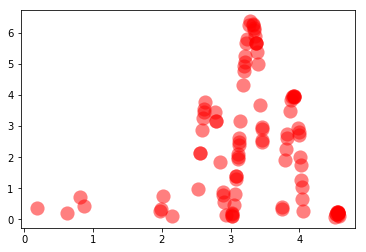

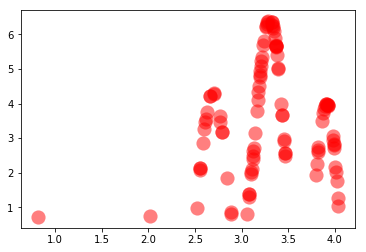

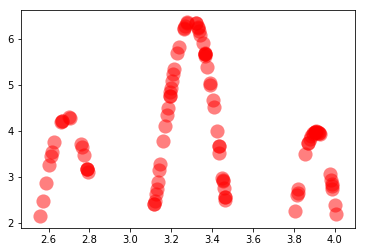

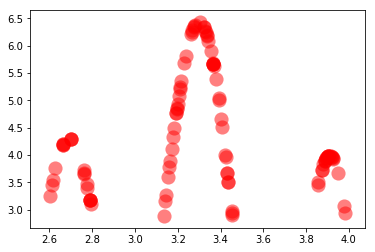

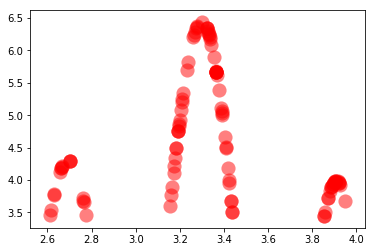

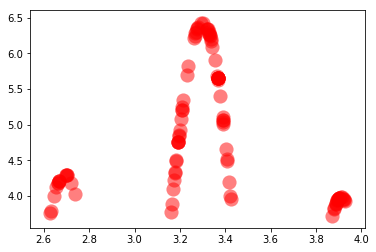

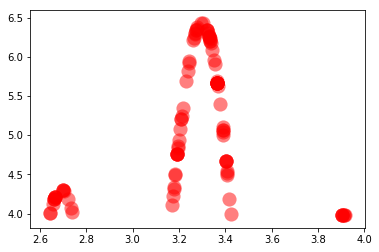

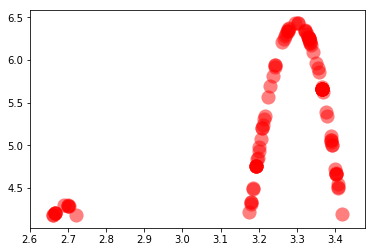

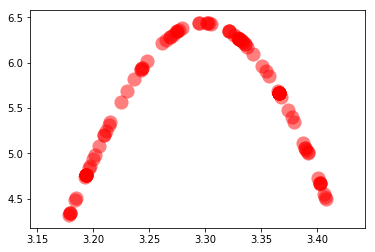

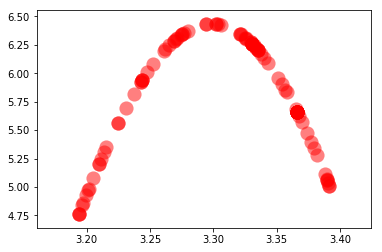

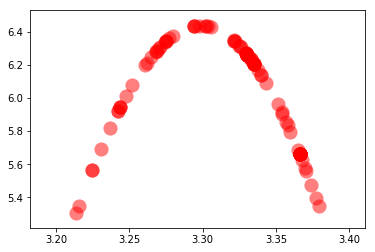

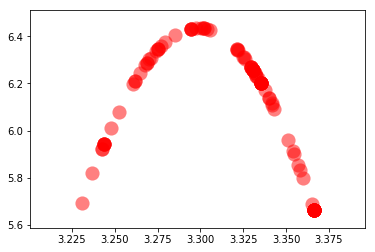

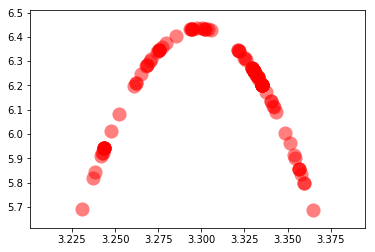

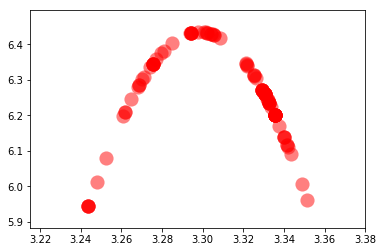

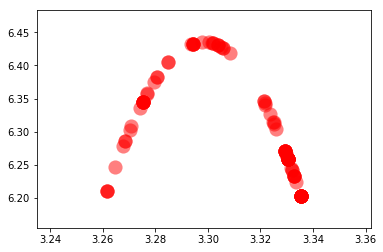

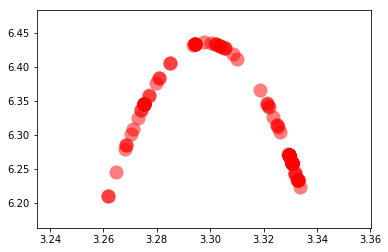

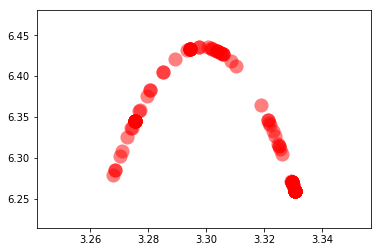

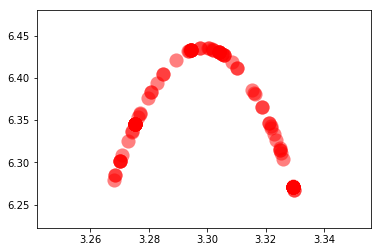

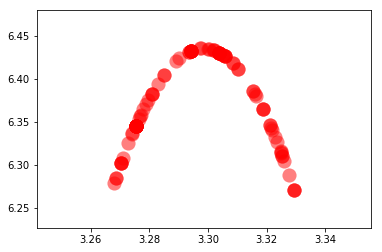

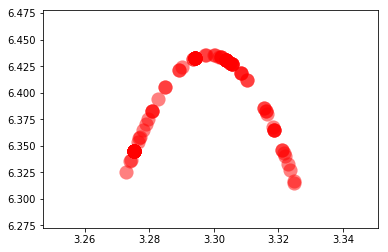

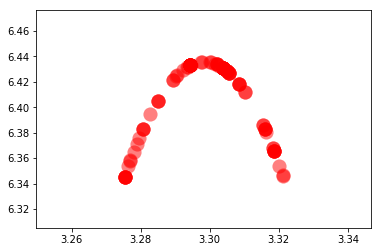

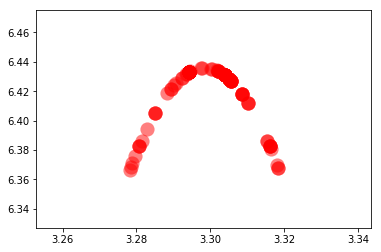

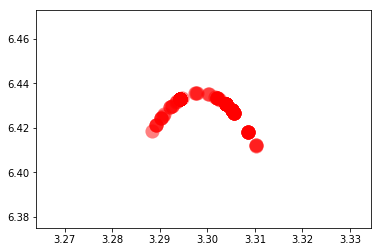

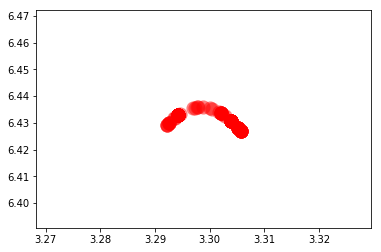

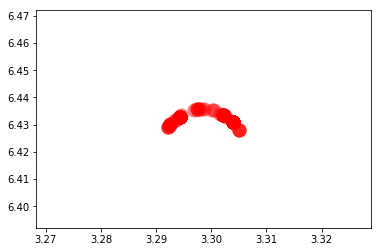

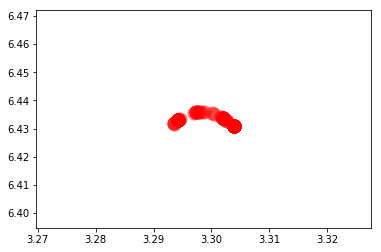

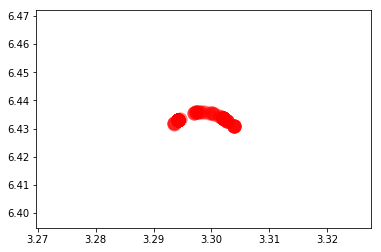

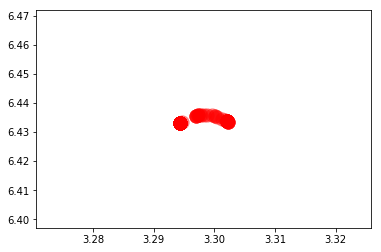

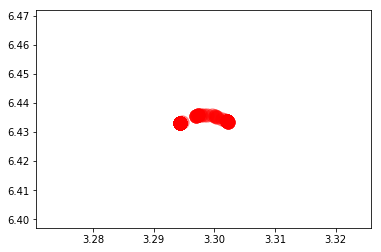

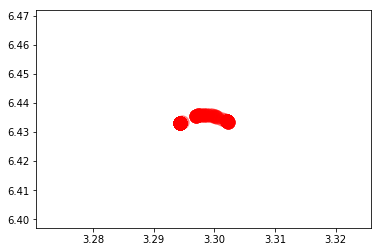

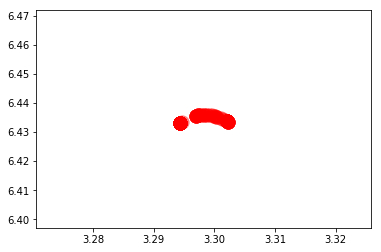

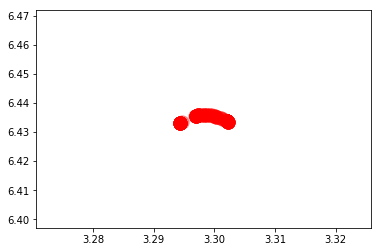

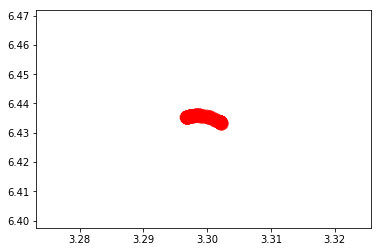

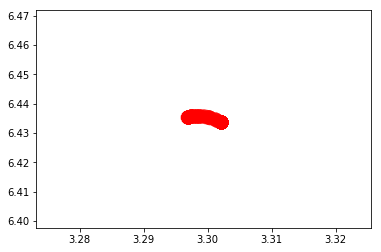

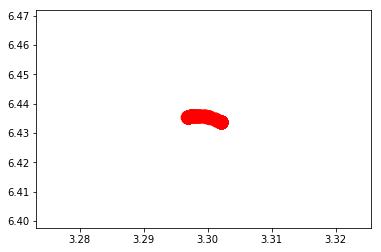

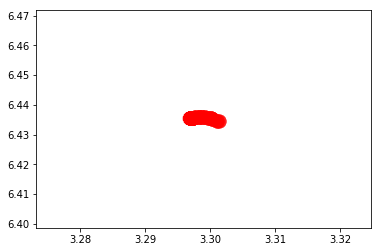

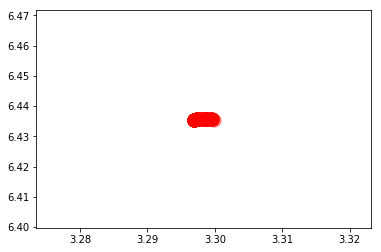

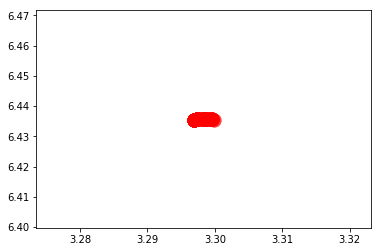

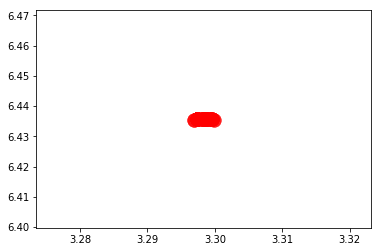

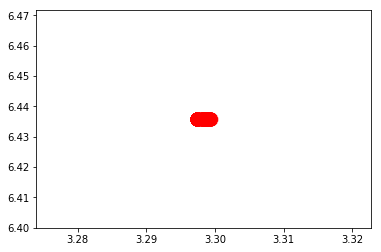

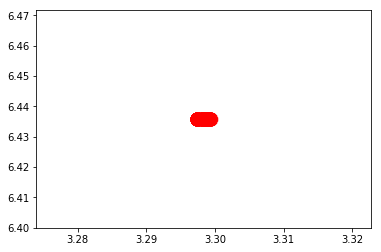

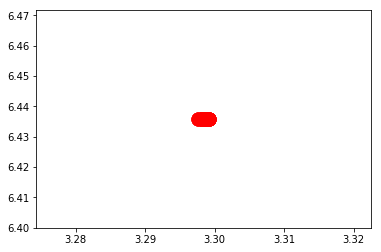

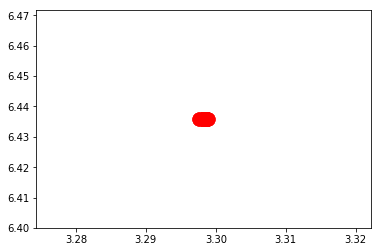

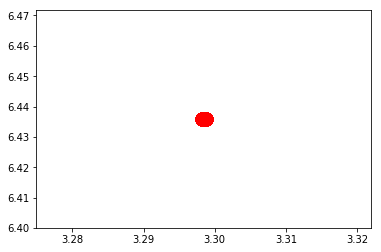

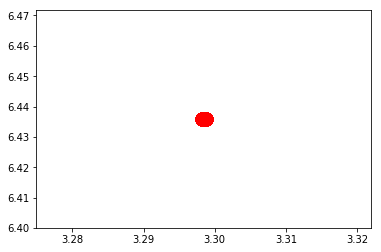

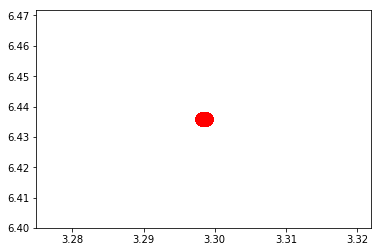

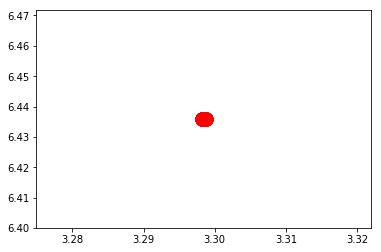

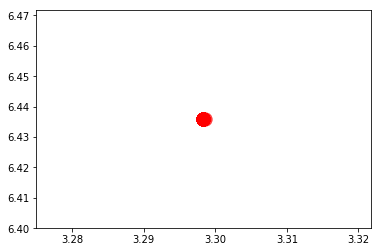

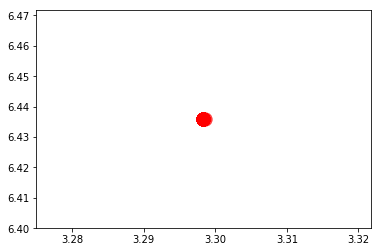

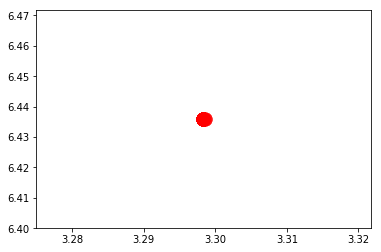

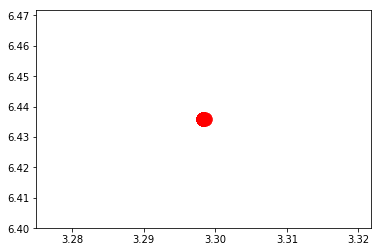

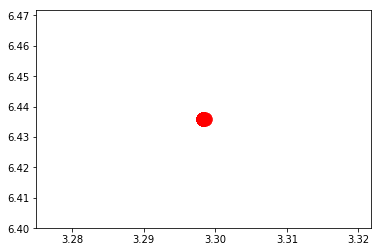

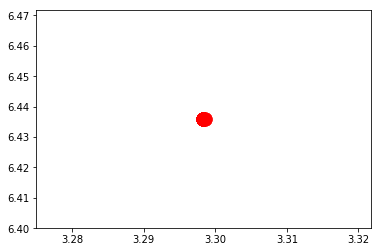

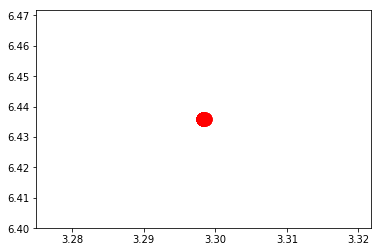

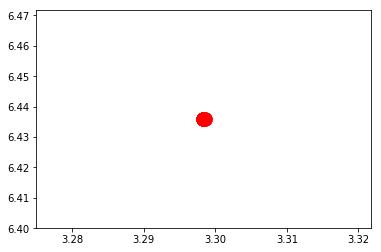

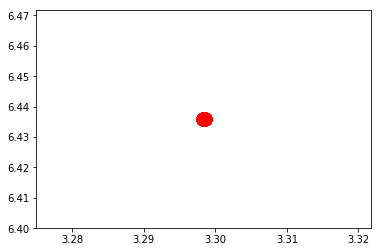

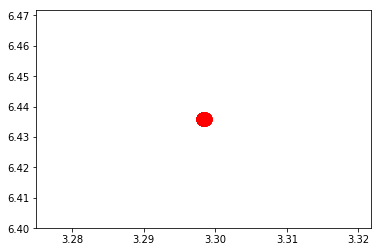

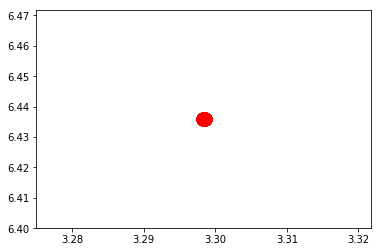

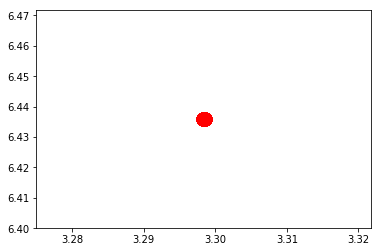

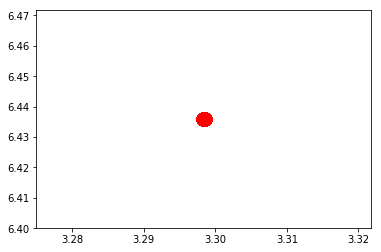

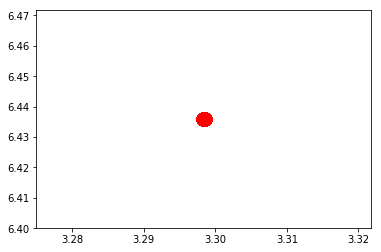

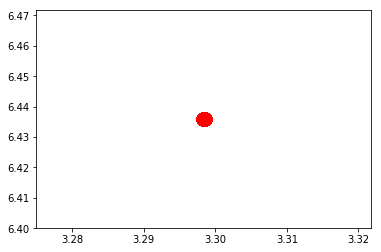

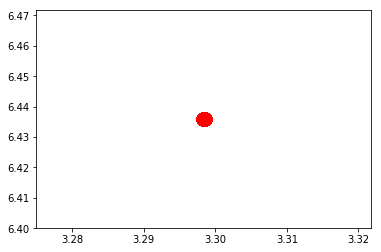

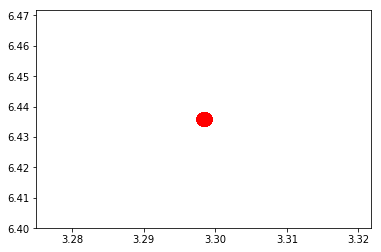

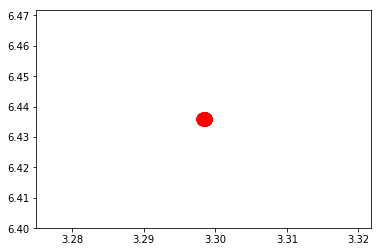

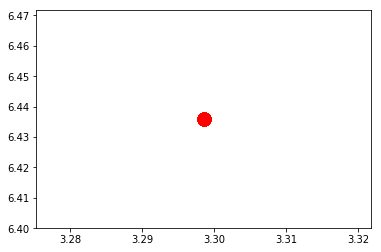

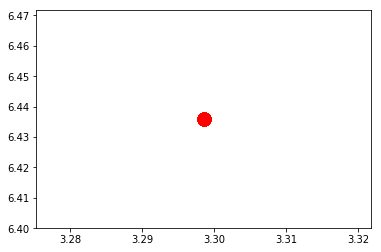

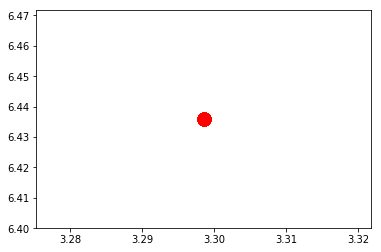

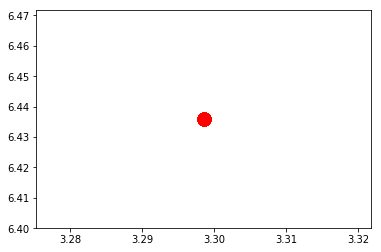

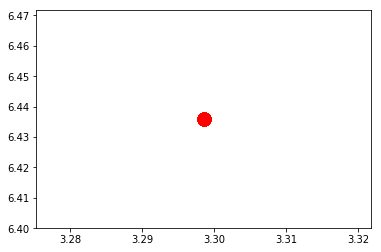

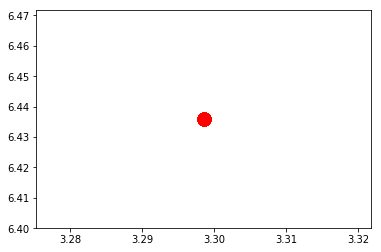

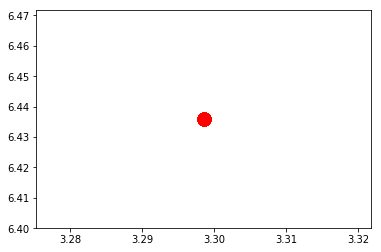

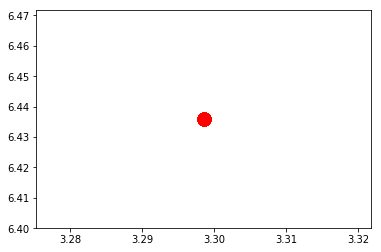

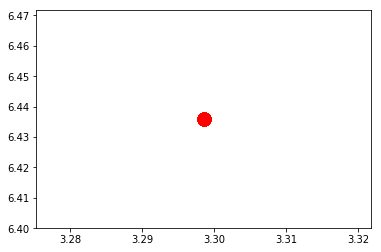

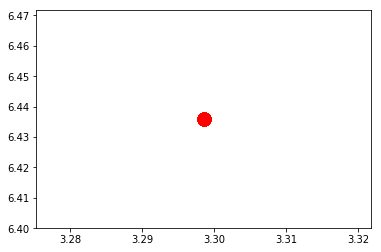

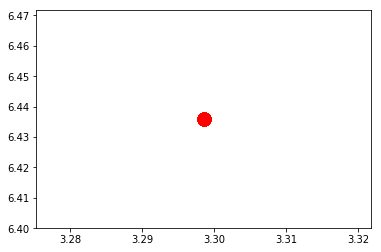

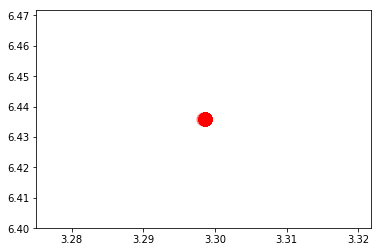

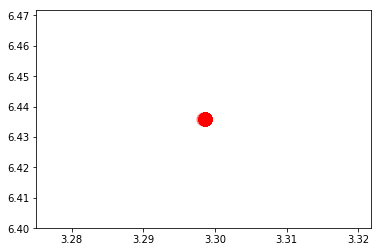

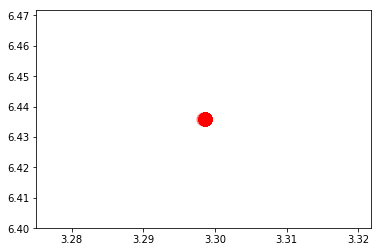

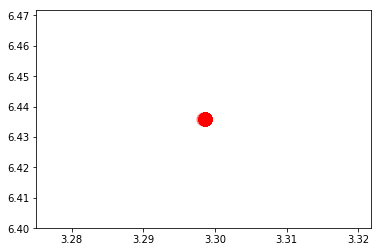

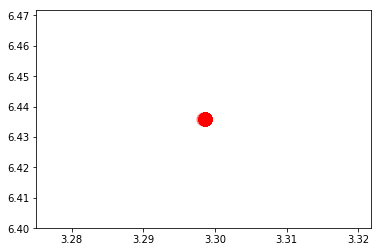

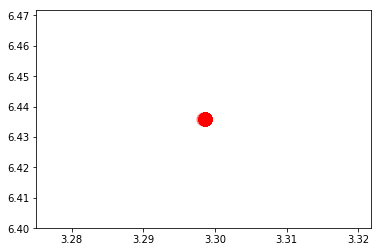

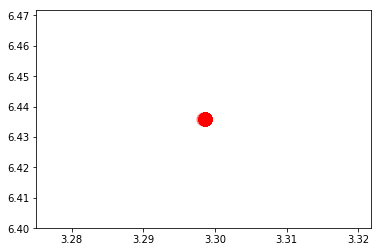

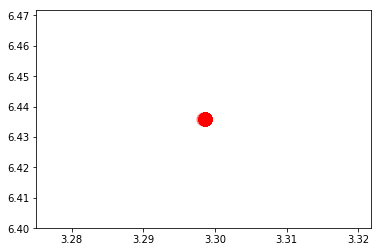

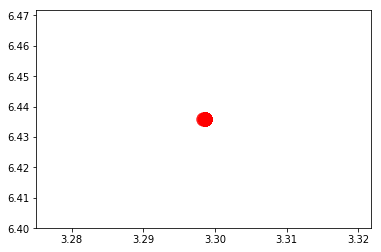

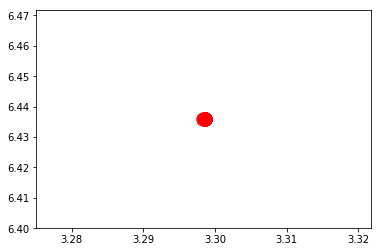

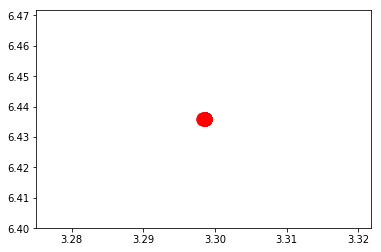

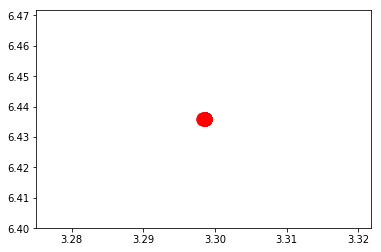

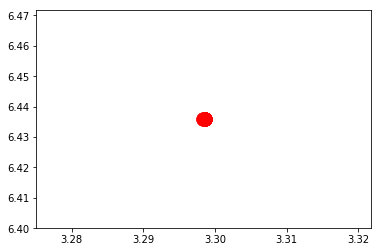

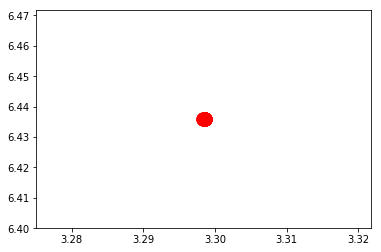

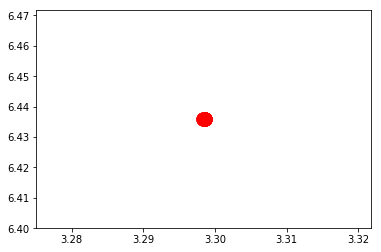

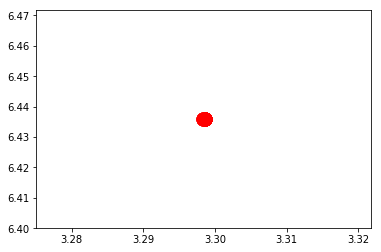

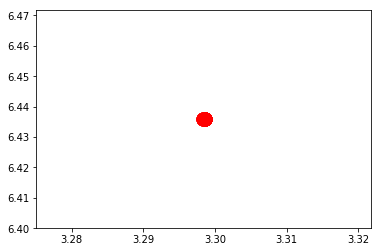

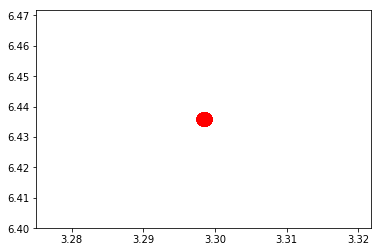

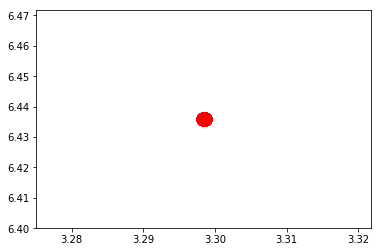

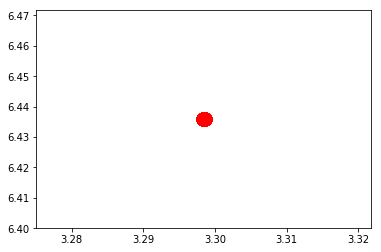

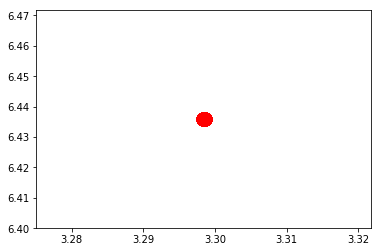

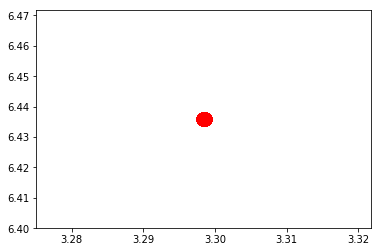

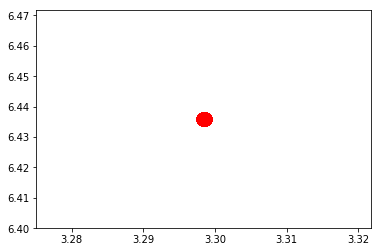

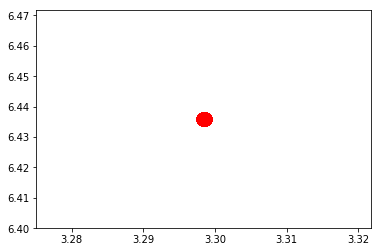

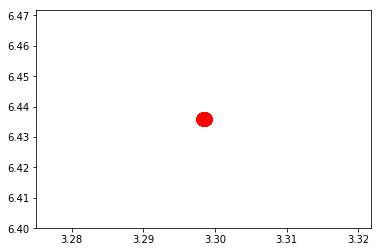

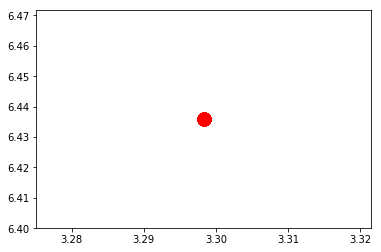

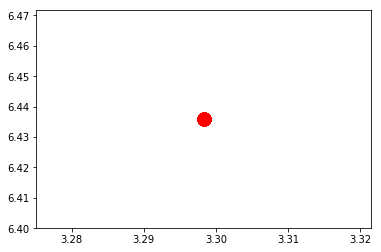

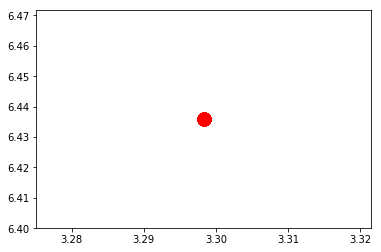

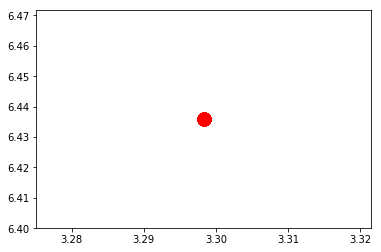

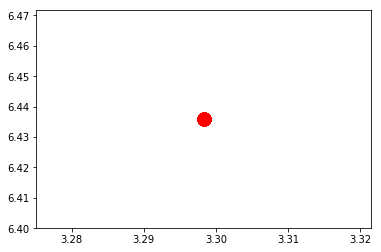

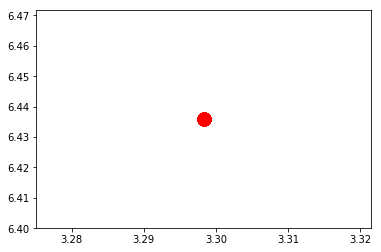

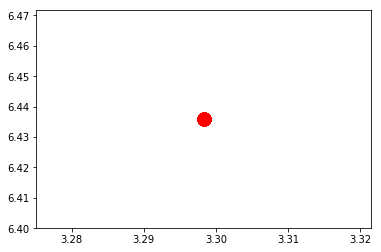

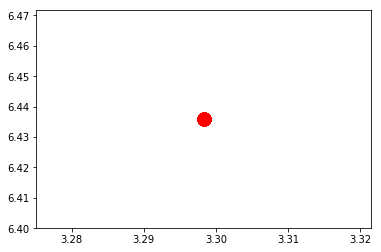

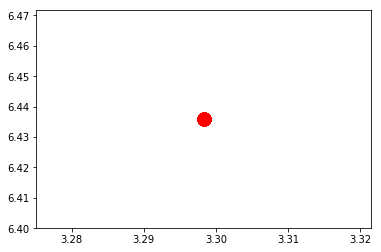

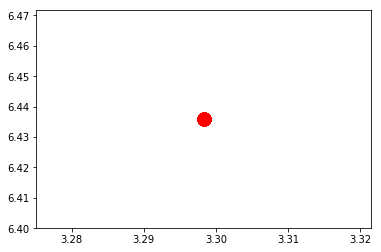

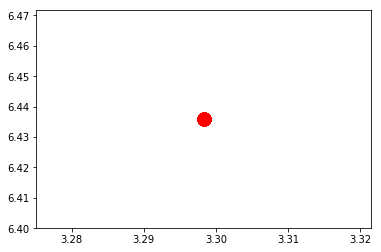

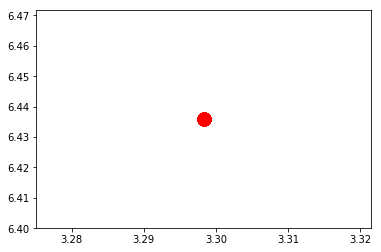

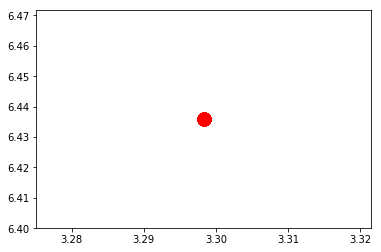

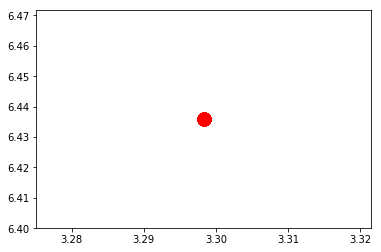

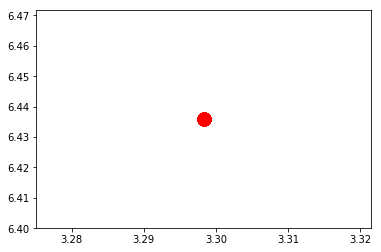

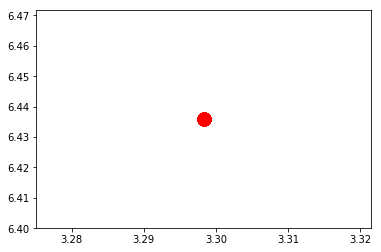

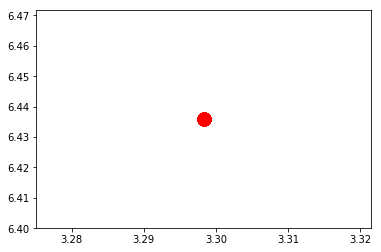

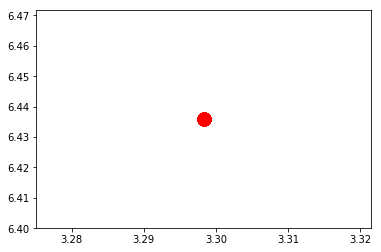

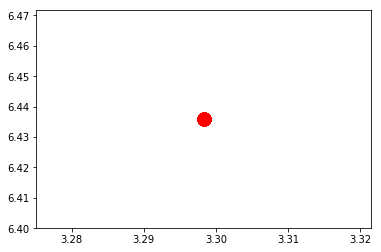

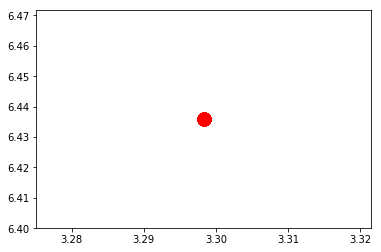

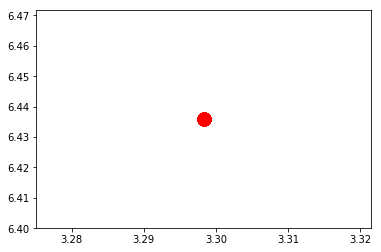

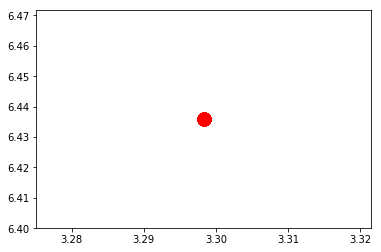

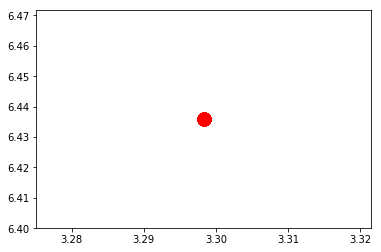

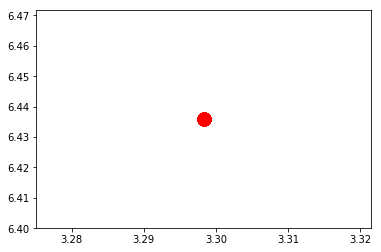

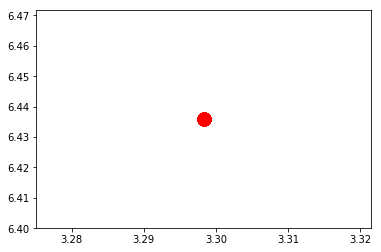

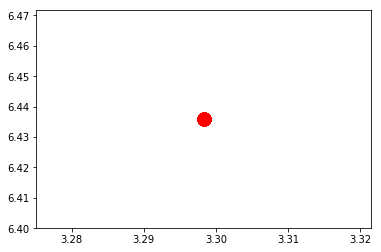

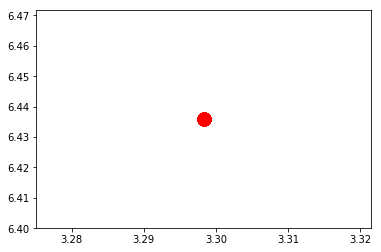

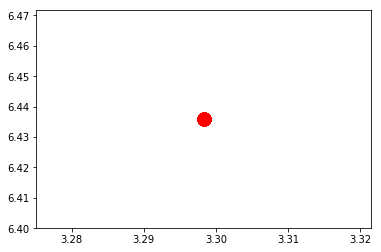

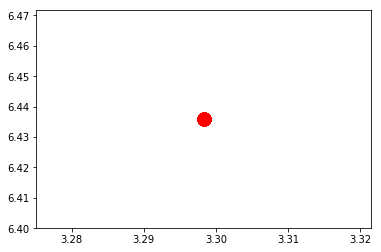

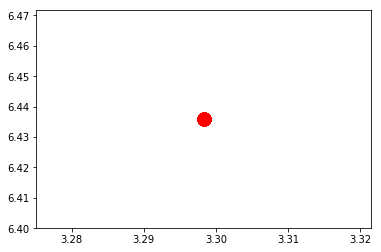

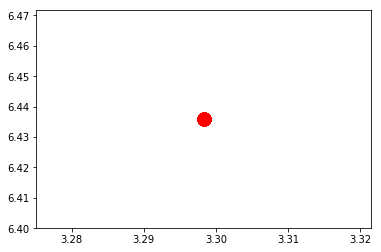

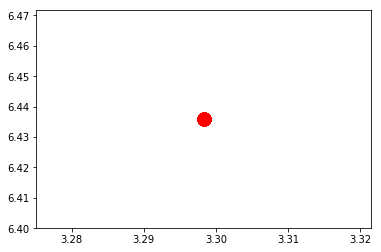

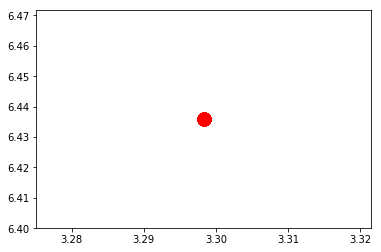

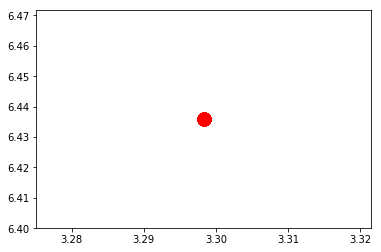

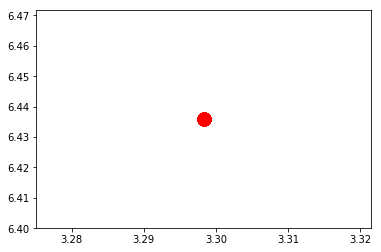

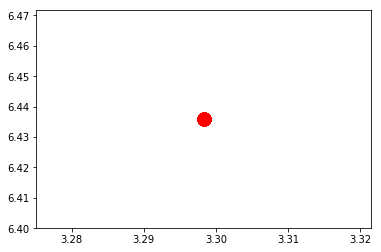

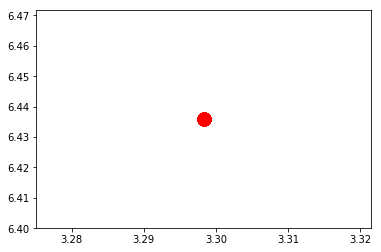

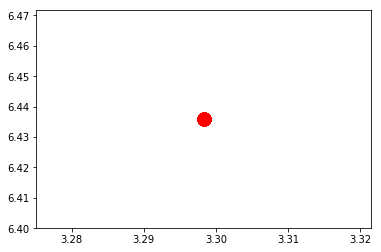

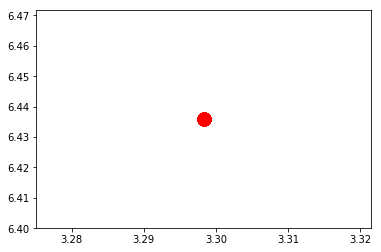

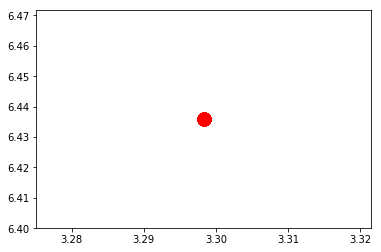

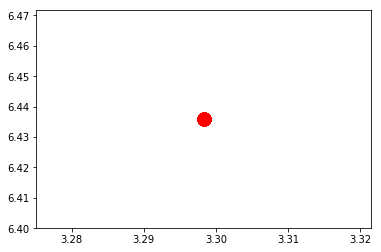

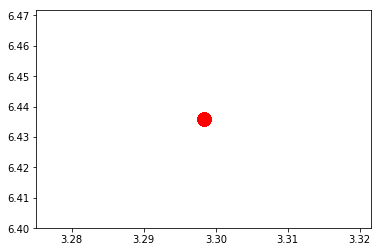

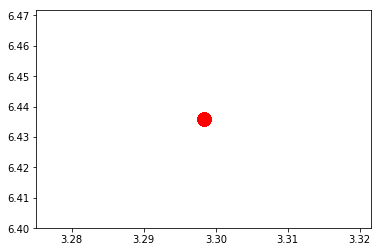

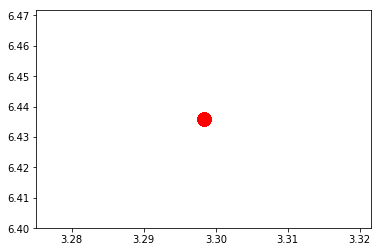

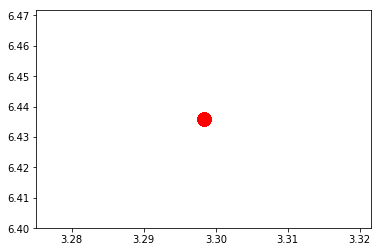

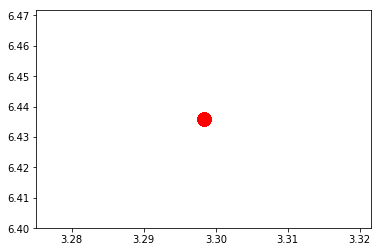

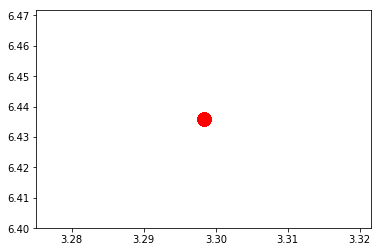

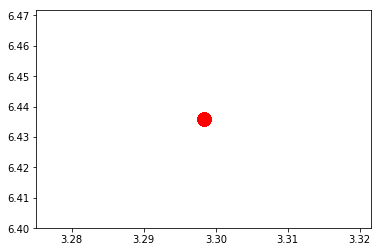

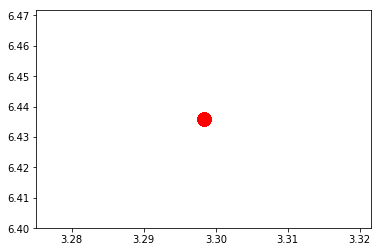

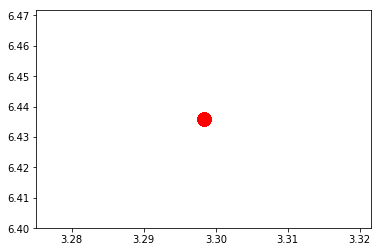

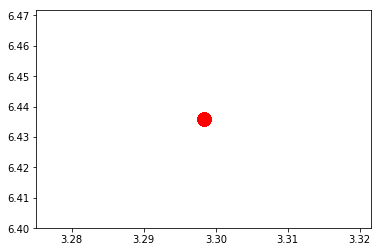

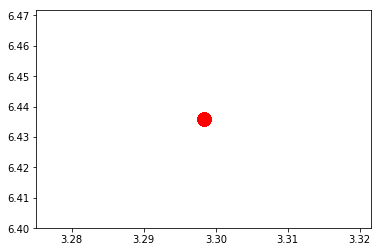

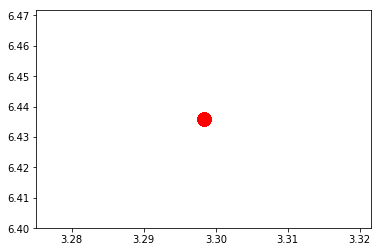

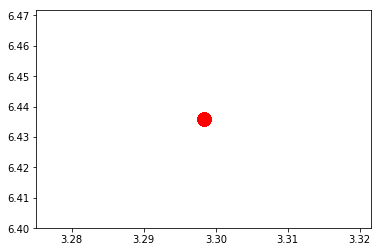

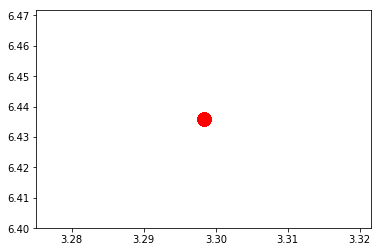

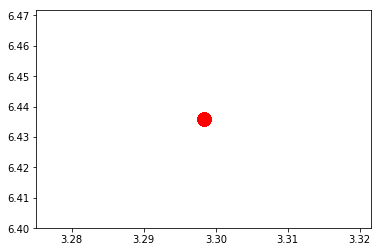

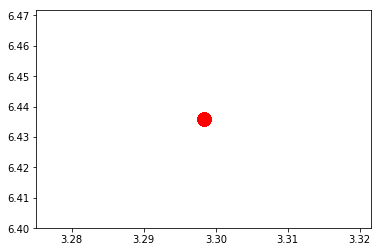

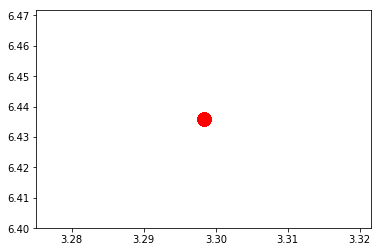

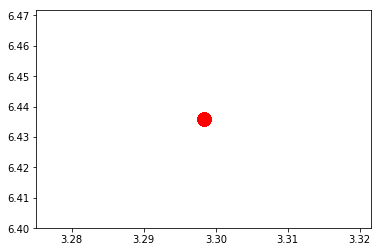

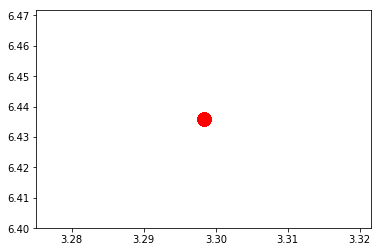

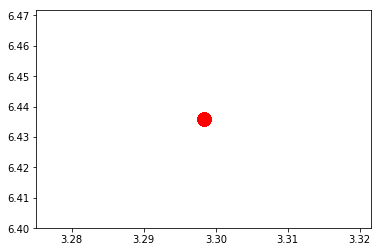

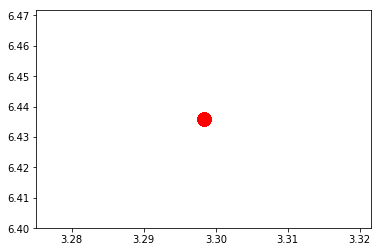

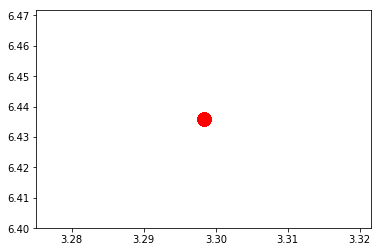

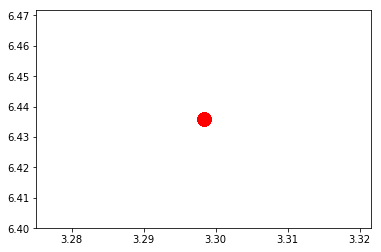

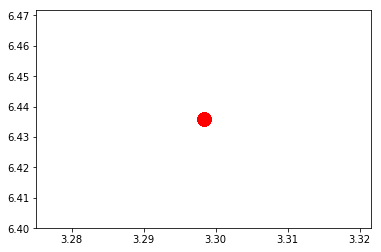

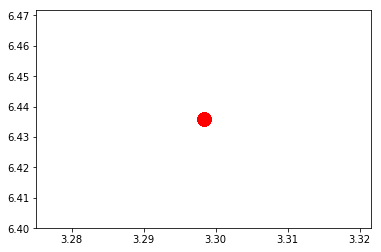

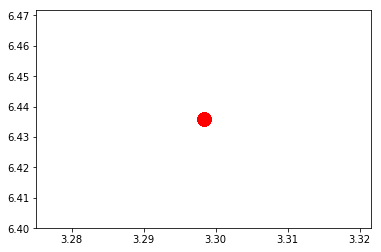

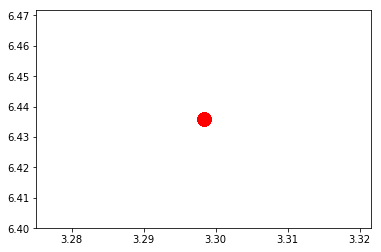

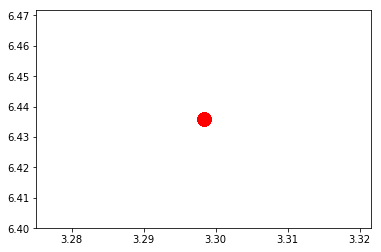

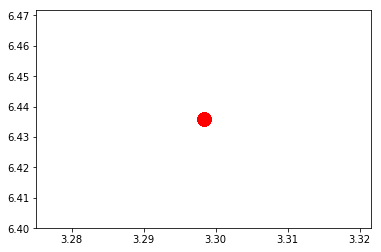

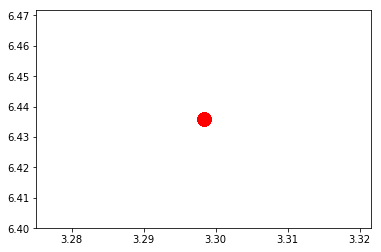

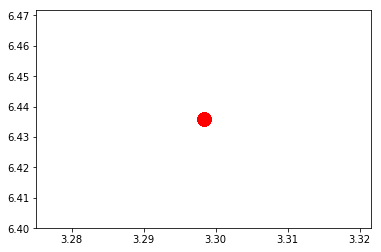

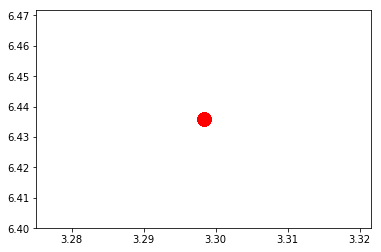

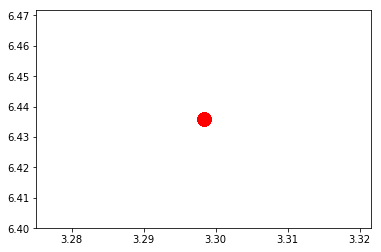

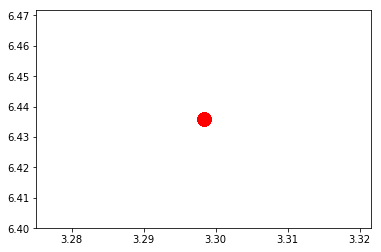

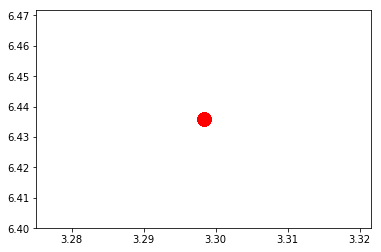

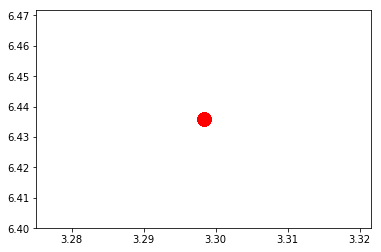

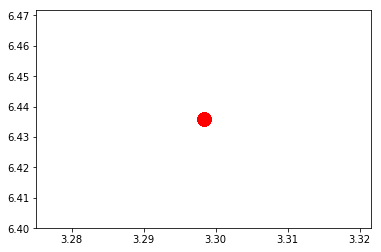

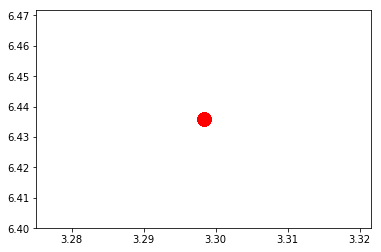

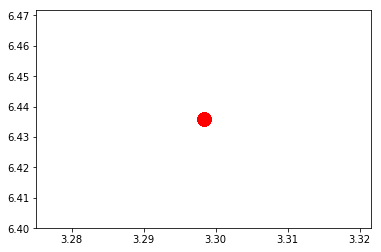

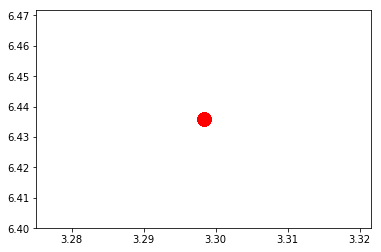

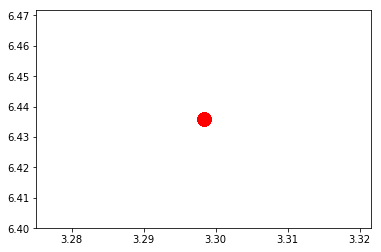

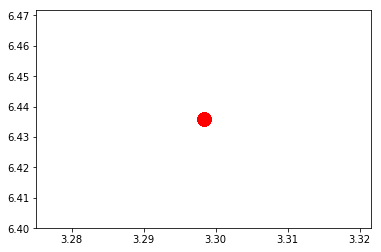

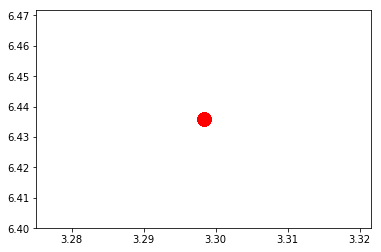

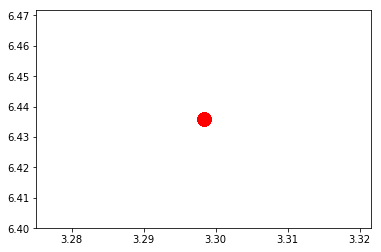

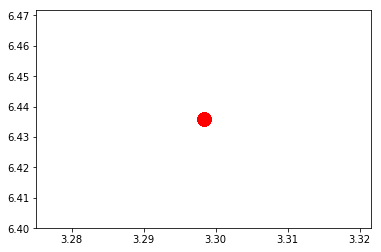

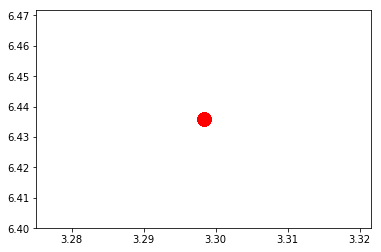

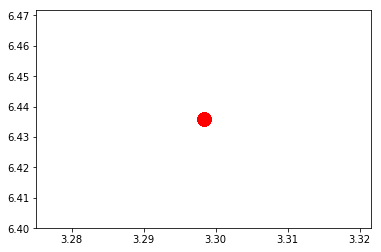

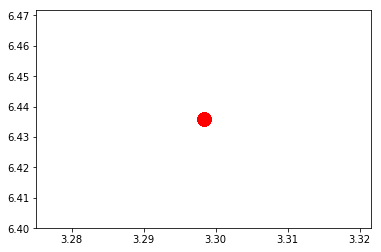

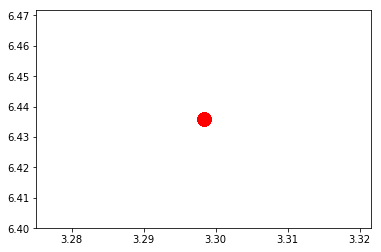

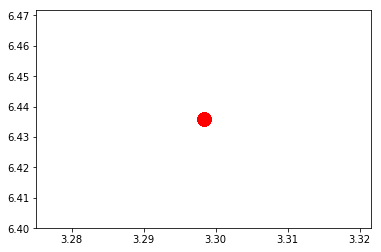

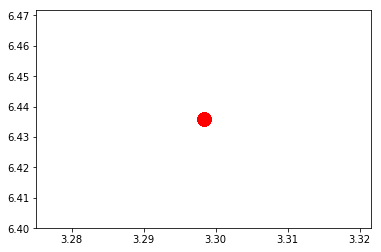

In [12]:
for _ in range(N_GENERACIONES):
    
    if 'sca' in globals(): sca.remove()
    sca = plt.scatter(pop['ADN'], F(pop['ADN']), s=200, lw=0, c='red', alpha=0.5); plt.pause(0.05)

    # Parte de Estrategia de Evolucion (EJECUCIÓN mu, landa)
    kids = make_kid(pop, N_HIJOS)
    pop = kill_bad(pop, kids)   # Mantener un buen padre para el elitismo

plt.ioff(); plt.show()